In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

shape: (3_259, 3)
┌─────────────────────┬──────┬─────┐
│ id                  ┆ from ┆ to  │
│ ---                 ┆ ---  ┆ --- │
│ str                 ┆ str  ┆ str │
╞═════════════════════╪══════╪═════╡
│ aus.2000.meas.1.00  ┆ P1   ┆ P2  │
│ aus.2000.meas.1.00  ┆ P1   ┆ P3  │
│ aus.2000.meas.1.00  ┆ P3   ┆ P4  │
│ aus.2000.meas.1.00  ┆ P3   ┆ P5  │
│ aus.2003.meas.1.00  ┆ P1   ┆ P2  │
│ …                   ┆ …    ┆ …   │
│ rou.2020.covid.1.16 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.17 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.18 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.19 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.20 ┆ P1   ┆ P2  │
└─────────────────────┴──────┴─────┘
['aus.2000.meas.1.00', 'aus.2003.meas.1.00', 'aus.2010.meas.1.00', 'bgd.2001.nph.1.01', 'bgd.2001.nph.1.02', 'bgd.2001.nph.1.03', 'bgd.2001.nph.1.04', 'bgd.2001.nph.1.05', 'bgd.2001.nph.1.06', 'bgd.2001.nph.1.07', 'bgd.2001.nph.1.08', 'bgd.2001.nph.1.11', 'bgd.2001.nph.1.12', 'bgd.2001.nph.1.13', 'bgd.2001.nph.1.14', 'bgd.2001.nph.1.15', 'bgd.2001.nph

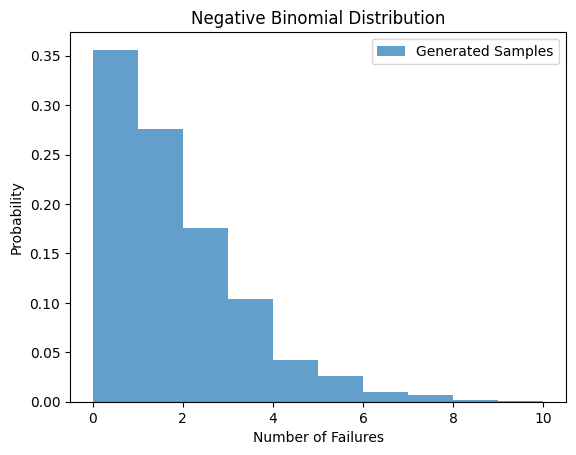

In [12]:
edges = pl.read_csv("edgelists1.csv") #loading data
nodes = pl.read_csv("node_info1.csv")
print(edges)

id_list = edges['id'].unique(maintain_order=True).to_list() #keeps the main order
#id_list = sorted(edges['id'].unique().to_list()) #alphabetical sort 
print(id_list)

all_deg = []

def makegraph (a): 
    edges_group = edges.filter(pl.col('id') == a)
    G = nx.from_pandas_edgelist(edges_group, source = 'from', target = 'to') #Get the information from the tables df with node being from, target being to, and edges from connectivity (which one the node is connected to)
    #nx.draw(G, node_color = 'blue', node_size = 10, edgecolors='black', alpha = 0.7) #This draws the graph with specified node color, size, edge color and transparency
    #plt.title(a)  # add a title for each graph
    #plt.show()
    degrees = [d for n, d in G.degree()] #for each node in the node/degree dict, takes just the degrees into a list
    less2 = [d for d in degrees if d < 2]
    p = len(less2)/len(degrees)
    r = 2
    mean_degree = np.mean(degrees)
    var_degree = np.var(degrees)
    sample = np.random.negative_binomial(r, p)
    print(f"Single sample (number of failures): {sample}")
    samples = np.random.negative_binomial(r, p, size=1000)
    print(f"First 10 samples (number of failures): {samples[:10]}")
    plt.hist(samples, bins=range(max(samples) + 2), density=True, alpha=0.7, label='Generated Samples')
    plt.title('Negative Binomial Distribution')
    plt.xlabel('Number of Failures')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

len(id_list)
#for i in id_list: #there's 382 networks so idk how we can make all of them and display 
#    makegraph(i)

makegraph(id_list[0])


